In [101]:
#Scrape items needed
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt
import random


In [102]:
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X


In [103]:
def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)
    


In [104]:
def get_mat(txt_file="test_pack_23.txt"):
    last = []
    with open (txt_file) as fo:
        for rec in fo:
            rec=rec.rstrip()
            last.append(rec[-7:])
    fill_ratio = last[-1].split("(")[1].split(")")[0]
    return fill_ratio
    

In [105]:
test_var=str(get_mat())

In [110]:
def get_line(txt_file="test_pack_23.txt"):
    index=0
    flag=0
    with open (txt_file) as fo:
        for rec in fo:
            index += 1
            if test_var in rec:
                flag=1
                break
        if flag ==0:
            print('String', test_var , 'Not Found') 
        else: 
            #print('String', test_var, 'Found In Line', index)
            return index

In [111]:
index_line=get_line()
index_line

44

In [116]:
def get_dim(txt_file="test_pack_23.txt",inde=index_line):
    index=0
    dime=[]
    items = {1:[], 2:[], 3:[]}
    with open (txt_file) as fo:
        for rec in fo:
            index += 1
            if index == inde:
                sick=rec.strip().split("box")[1].split(",")[0].split("(")[1]
                x=float(sick.split("x")[0])
                y=float(sick.split("x")[1].split("x")[0])
                z=float(sick.split("x")[-1])
                dime.append(x)
                dime.append(y)
                dime.append(z)
                box=rec.strip().split(" ")[1].split("(")[0]
                dime.append(box)
                numb_items= int(rec.strip().split("item_number(")[1].strip(")")[0])
                dime.append(numb_items)
            elif index == inde+2:
                item_dim=rec.strip().split("(")[1].split(",")[0]
                x=float(item_dim.split("x")[0])
                y=float(item_dim.split("x")[1].split("x")[0])
                z=float(item_dim.split("x")[-1])
                items[1].append(x)
                items[1].append(y)
                items[1].append(z)
                pos=rec.strip().split("pos([")[1].split("]")[0]
                xx=float(pos.split(",")[0])
                xy=float(pos.split(",")[1].split(",")[0].strip())
                xz=float(pos.split(",")[0].strip())
                rt=int(rec.split("rt(")[1].split(") vol(")[0].strip())
                items[1].append(xx)
                items[1].append(xy)
                items[1].append(xz)
                items[1].append(rt)
                dime.append(items[1])
                if dime[4]==1:
                    break
                elif dime[4]==2:
                    continue
                elif dime[4]==3:
                    continue
            elif index == inde+3:
                item_dim=rec.strip().split("(")[1].split(",")[0]
                x=float(item_dim.split("x")[0])
                y=float(item_dim.split("x")[1].split("x")[0])
                z=float(item_dim.split("x")[-1])
                items[2].append(x)
                items[2].append(y)
                items[2].append(z)
                pos=rec.strip().split("pos([")[1].split("]")[0]
                xx=float(pos.split(",")[0])
                xy=float(pos.split(",")[1].split(",")[0].strip())
                xz=float(pos.split(",")[0].strip())
                rt=int(rec.split("rt(")[1].split(") vol(")[0].strip())
                items[2].append(xx)
                items[2].append(xy)
                items[2].append(xz)
                items[2].append(rt)
                dime.append(items[2])
                if dime[4]==2:
                    break
                elif dime[4]==3:
                    continue
            elif index == inde+4:
                item_dim=rec.strip().split("(")[1].split(",")[0]
                x=float(item_dim.split("x")[0])
                y=float(item_dim.split("x")[1].split("x")[0])
                z=float(item_dim.split("x")[-1])
                items[3].append(x)
                items[3].append(y)
                items[3].append(z)
                pos=rec.strip().split("pos([")[1].split("]")[0]
                xx=float(pos.split(",")[0])
                xy=float(pos.split(",")[1].split(",")[0].strip())
                xz=float(pos.split(",")[0].strip())
                rt=int(rec.split("rt(")[1].split(") vol(")[0].strip())
                items[3].append(xx)
                items[3].append(xy)
                items[3].append(xz)
                items[3].append(rt)
                dime.append(items[3])
                break
        return(dime)

In [122]:
troo = get_dim()
troo

[15.0,
 15.0,
 5.5,
 'large-box',
 2,
 [11.14, 3.43, 8.9, 0.0, 0.0, 0.0, 1],
 [8.5, 2.01, 6.65, 0.0, 0.0, 0.0, 1]]

In [118]:
def convert(list):
    return tuple(list)

[(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]


<ipython-input-124-4917681b7ad2>:229: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


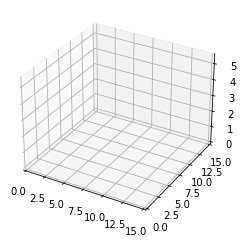

In [124]:
positions=[]
sizes=[]
color_options=["grey","wheat","goldenrod","indianred","royalblue","slateblue","dodgerblue","darkolivegreen","teal","darkcyan","seagreen","palegreen","brown","maroon","firebrick"]
colors=[]
def make_positions(list=troo):
    if len(list)==6:
        a=[list[5][3],list[5][4],list[5][5]]
        a=convert(a)
        positions.append(a)

        randomindex= random.sample(color_options,1)
        colors.append(randomindex)

        ascen=[]
        ascen.append(list[5][0])
        ascen.append(list[5][1])
        ascen.append(list[5][2])
        ascen.sort()

        if list[5][6] == 1:
            d=[ascen[0],ascen[2],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 2:
            d=[ascen[2],ascen[0],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 3:
            d=[ascen[1],ascen[0],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 4:
            d=[ascen[0],ascen[1],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 5:
            d=[ascen[2],ascen[1],ascen[0]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 6:
            d=[ascen[1],ascen[2],ascen[0]]
            d=convert(d)
            sizes.append(d)

    elif len(list)==7:
        a=[list[5][3],list[5][4],list[5][5]]
        b=[list[6][3],list[6][4],list[6][5]]
        a=convert(a)
        b=convert(b)
        positions.append(a)
        positions.append(b)
    
        randomindex= random.sample(color_options,2)
        colors.append(randomindex)

        ascen=[]
        ascen.append(list[5][0])
        ascen.append(list[5][1])
        ascen.append(list[5][2])
        ascen.sort()

        ascen1=[]
        ascen1.append(list[6][0])
        ascen1.append(list[6][1])
        ascen1.append(list[6][2])
        ascen1.sort()

        if list[5][6] == 1:
            d=[ascen[0],ascen[2],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 2:
            d=[ascen[2],ascen[0],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 3:
            d=[ascen[1],ascen[0],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 4:
            d=[ascen[0],ascen[1],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 5:
            d=[ascen[2],ascen[1],ascen[0]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 6:
            d=[ascen[1],ascen[2],ascen[0]]
            d=convert(d)
            sizes.append(d)

        if list[6][6] == 1:
            e=[ascen1[0],ascen1[2],ascen1[1]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 2:
            e=[ascen1[2],ascen1[0],ascen1[1]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 3:
            e=[ascen1[1],ascen1[0],ascen1[2]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 4:
            e=[ascen1[0],ascen1[1],ascen1[2]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 5:
            e=[ascen1[2],ascen1[1],ascen1[0]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 6:
            e=[ascen1[1],ascen1[2],ascen1[0]]
            e=convert(e)
            sizes.append(e)
    
    elif len(list)==8:
        a=(list[5][3],list[5][4],list[5][5])
        b=(list[6][3],list[6][4],list[6][5])
        c=(list[7][3],list[7][4],list[7][5])
        positions.append(a)
        positions.append(b)
        positions.append(c)

        randomindex= random.sample(color_options,3)
        colors.append(randomindex)

        ascen=[]
        ascen.append(list[5][0])
        ascen.append(list[5][1])
        ascen.append(list[5][2])
        ascen.sort()

        ascen1=[]
        ascen1.append(list[6][0])
        ascen1.append(list[6][1])
        ascen1.append(list[6][2])
        ascen1.sort()

        ascen2=[]
        ascen2.append(list[7][0])
        ascen2.append(list[7][1])
        ascen2.append(list[7][2])
        ascen2.sort()

        if list[5][6] == 1:
            d=[ascen[0],ascen[2],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 2:
            d=[ascen[2],ascen[0],ascen[1]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 3:
            d=[ascen[1],ascen[0],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 4:
            d=[ascen[0],ascen[1],ascen[2]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 5:
            d=[ascen[2],ascen[1],ascen[0]]
            d=convert(d)
            sizes.append(d)
        elif list[5][6] == 6:
            d=[ascen[1],ascen[2],ascen[0]]
            d=convert(d)
            sizes.append(d)

        if list[6][6] == 1:
            e=[ascen1[0],ascen1[2],ascen1[1]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 2:
            e=[ascen1[2],ascen1[0],ascen1[1]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 3:
            e=[ascen1[1],ascen1[0],ascen1[2]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 4:
            e=[ascen1[0],ascen1[1],ascen1[2]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 5:
            e=[ascen1[2],ascen1[1],ascen1[0]]
            e=convert(e)
            sizes.append(e)
        elif list[6][6] == 6:
            e=[ascen1[1],ascen1[2],ascen1[0]]
            e=convert(e)
            sizes.append(e)

        if list[7][6] == 1:
            f=[ascen2[0],ascen2[2],ascen2[1]]
            f=convert(f)
            sizes.append(f)
        elif list[7][6] == 2:
            f=[ascen2[2],ascen2[0],ascen2[1]]
            f=convert(f)
            sizes.append(f)
        elif list[7][6] == 3:
            f=[ascen2[1],ascen2[0],ascen2[2]]
            f=convert(f)
            sizes.append(f)
        elif list[7][6] == 4:
            f=[ascen2[0],ascen2[1],ascen2[2]]
            f=convert(f)
            sizes.append(f)
        elif list[7][6] == 5:
            f=[ascen2[2],ascen2[1],ascen2[0]]
            f=convert(f)
            sizes.append(f)
        elif list[7][6] == 6:
            f=[ascen2[1],ascen2[2],ascen2[0]]
            f=convert(f)
            sizes.append(f)

make_positions()
print(sizes)
# positions = [(0,0,0),(0,0,2.4),(6,0,2.4)]
# sizes = [(10.32,7.52,2.4),(6,4,4.2),(3.5,3,3.0)]
# colors = ["crimson","limegreen","navy"]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
#ax.set_axis_off()

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k")
ax.add_collection3d(pc)    

ax.set_xlim([0,troo[0]])
ax.set_ylim([0,troo[1]])
ax.set_zlim([0,troo[2]])

plt.show()
